In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("Position_Salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:

df = df.drop(['Position'],axis=True)

In [5]:
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


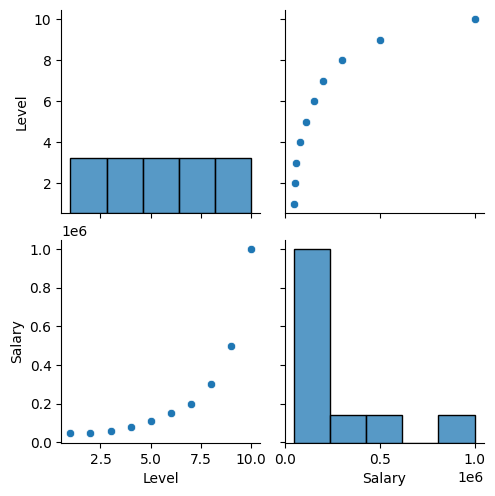

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
X = df.drop(["Salary"],axis=True)
y= df["Salary"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Linear Regression

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(x_train, y_train)

LinearRegression()

In [12]:
print("Training Accuracy :", reg.score(x_train, y_train))
print("Testing Accuracy :", reg.score(x_test, y_test))

Training Accuracy : 0.6366049276570868
Testing Accuracy : 0.8451346684575974


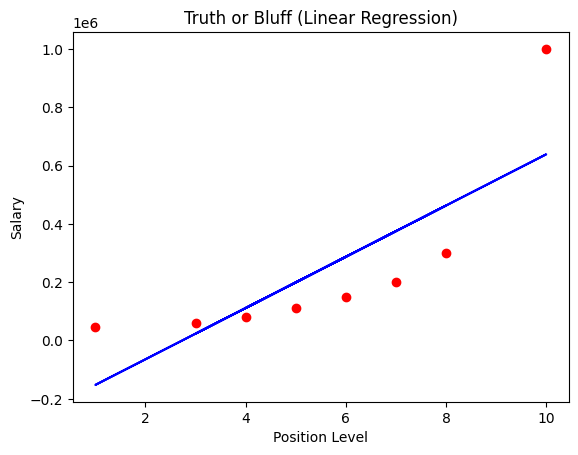

In [13]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Polynomial Regression

In [14]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
X_poly_test = poly_reg.transform(x_test)

In [15]:
print("Training Accuracy :", lin_reg_2.score(X_poly, y_train))
print("Testing Accuracy :", lin_reg_2.score(X_poly_test, y_test))

Training Accuracy : 0.9995857211026754
Testing Accuracy : 0.9714666803841342


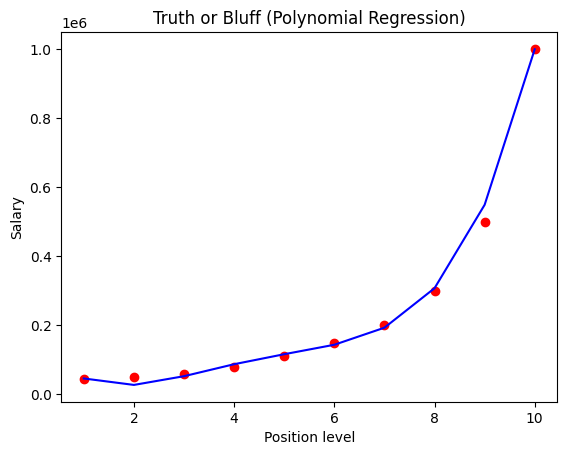

In [16]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()